# Case study with mixed images using the FICA implementation

In [1]:
#using Pkg
#Pkg.add("ImageView")
using Images, FileIO, Colors

## Loading the test images and converting them to a grayscale image
For this case study we used 2 cat pictures, they will be refered to as cat one and cat two by
order of appearance

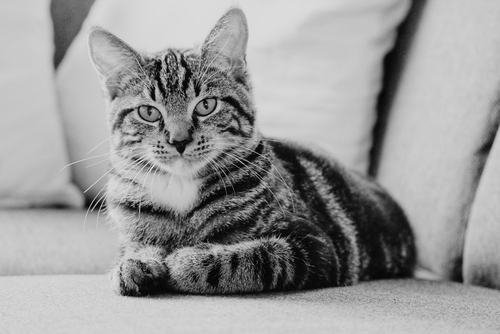

In [2]:
cat_one = load("cat_one_resize.jpg")
cat_oneg = Gray.(cat_one)

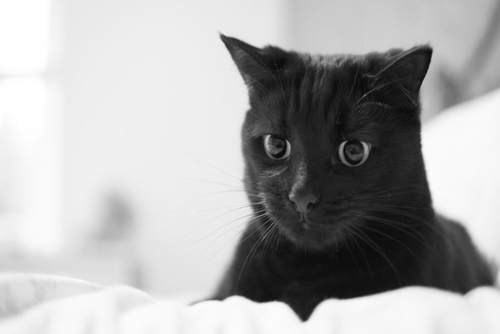

In [3]:
cat_two = load("cat_two_resize.jpg")
cat_twog = Gray.(cat_two)

## Mixing the images together to create 2 mixed images
For each image we use a different factor ( array A )
the first mixed image has a stronger presence from cat two and the second image a stronger presence from cat one

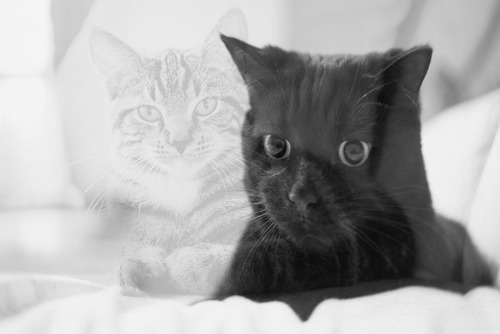

In [4]:
using LinearAlgebra
#convert image to array
mat_one = convert(Array{Float64},cat_oneg);
mat_two = convert(Array{Float64},cat_twog);
#get rows and column to later reconstruct the mixed image
rows,col = size(mat_one)
#convert 2D images to 1D (vector)
vec_one = vec(mat_one)';
vec_two = vec(mat_two)';

S = vcat(vec_one , vec_two)';

#generate first mixed signal
#factor used for the image
A = [0.2 , 0.8] 

X = (S .* A')'

X = X[1,:,]+X[2,:,]

imageX = reshape(X,rows,col)
save("mix_image_one.jpg",imageX)
load("mix_image_one.jpg")

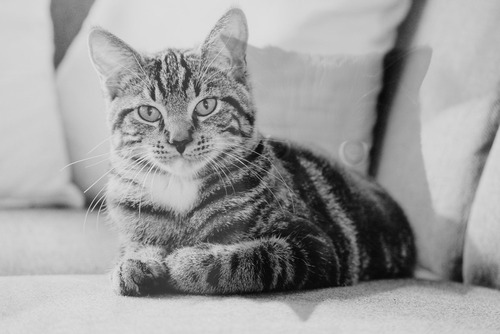

In [5]:
#generate second mixed signal
#factor used for the image
A = [0.8 , 0.2] 

Z = (S .* A')'

Z = Z[1,:,]+Z[2,:,]

imageZ = reshape(Z,rows,col)
save("mix_image_two.jpg",imageZ)
load("mix_image_two.jpg")


## Applying the FICA algorithm

In [9]:
include("fastICA.jl")
mixed_signal = hcat(X,Z);  
X1 = fastICA.whiten(mixed_signal)
X2 = mixed_signal * X1
J = fastICA.fast_ica(100,2,Array(X2),0.000001,1.,true)


wp = [0.676948, 0.323052]
w1 = [-0.9025, -0.43069]
W for iter 1 = [0.676948 0.323052; 0.562758 0.863737]


Change for iter 1 = 0.24991923921585102
wp = [-0.9025, -0.43069]
w1 = [0.9025, 0.43069]
W for iter 2 = [0.676948 0.323052; 0.562758 0.863737]
Change for iter 2 = 0.0
wp = [-0.8087, 0.0313051]
w1 = [-0.256309, -0.966595]
W for iter 1 = [0.676948 0.323052; 0.394504 0.605496]
Change for iter 1 = 0.8229820971343911
wp = [-0.256309, -0.966595]
w1 = [-0.977132, 0.212632]
W for iter 2 = [0.676948 0.323052; 0.394504 0.605496]
Change for iter 2 = 0.9550809575706314
wp = [-0.977132, 0.212632]
w1 = [0.0875726, -0.996158]
W for iter 3 = [0.676948 0.323052; 0.394504 0.605496]
Change for iter 3 = 0.7026149488086422
wp = [0.0875726, -0.996158]
w1 = [-0.927895, 0.372841]
W for iter 4 = [0.676948 0.323052; 0.394504 0.605496]
Change for iter 4 = 0.5473329813502319
wp = [-0.927895, 0.372841]
w1 = [0.351979, -0.936008]
W for iter 5 = [0.676948 0.323052; 0.394504 0.605496]
Change for iter 5 = 0.3244176709123725
wp = [0.351979, -0.936008]
w1 = [-0.868957, 0.494888]
W for iter 6 = [0.676948 0.323052; 0.39450

2×2 Array{Float64,2}:
 0.9025    0.43069 
 0.70671  -0.707503

## Results

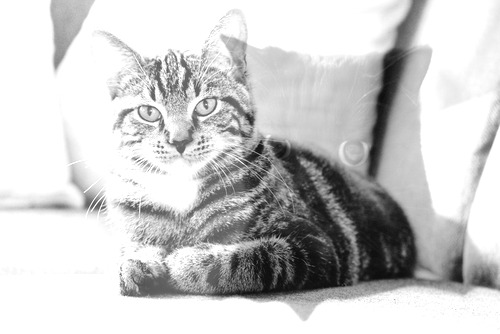

In [39]:
W = J * mixed_signal'
save("res_one.jpg",map(clamp01nan, reshape((W[1,:,]-W[2,:,]),rows,col)))
load("res_one.jpg")

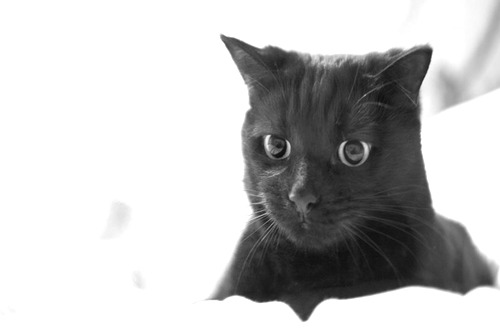

In [40]:
save("res_two.jpg",map(clamp01nan, reshape((W[1,:,]+W[2,:,]),rows,col)))
load("res_two.jpg")